installing the required packages 

In [227]:
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import psycopg2 # this will act as adapter 
from sqlalchemy import create_engine


In [177]:
import os 
os.getcwd()
os.listdir()

['.vscode',
 'Include',
 'Lib',
 'project.ipynb',
 'pyvenv.cfg',
 'requirements.txt',
 'Scripts',
 'share',
 'Walmart.csv']

In [178]:
df =pd.read_csv('Walmart.csv', encoding_errors='ignore')

data inspections


In [179]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [180]:
df.tail()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
10046,9996,WALM056,Rowlett,Fashion accessories,$37,3.0,03/08/23,10:10:00,Cash,3.0,0.33
10047,9997,WALM030,Richardson,Home and lifestyle,$58,2.0,22/02/21,14:20:00,Cash,7.0,0.48
10048,9998,WALM050,Victoria,Fashion accessories,$52,3.0,15/06/23,16:00:00,Credit card,4.0,0.48
10049,9999,WALM032,Tyler,Home and lifestyle,$79,2.0,25/02/21,12:25:00,Cash,7.0,0.48
10050,10000,WALM069,Rockwall,Fashion accessories,$62,3.0,26/09/20,9:48:00,Cash,3.0,0.33


In [181]:
df.sample(10)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
7137,7138,WALM009,Plano,Fashion accessories,$69,3.0,01/12/21,18:57:00,Credit card,6.0,0.48
2916,2917,WALM002,Dallas,Home and lifestyle,$63,1.0,26/12/22,16:59:00,Ewallet,7.0,0.36
6010,6011,WALM074,Weslaco,Home and lifestyle,$72,2.0,06/11/20,19:39:00,Cash,6.0,0.33
2365,2366,WALM044,Pharr,Fashion accessories,$23,2.0,02/07/21,16:48:00,Ewallet,8.0,0.48
5402,5403,WALM057,Euless,Home and lifestyle,$81,2.0,05/11/23,18:57:00,Credit card,7.0,0.33
6941,6942,WALM087,Waxahachie,Fashion accessories,$81,3.0,16/12/20,18:35:00,Credit card,5.0,0.33
3425,3426,WALM045,Missouri City,Fashion accessories,$74,2.0,03/08/22,14:54:00,Credit card,4.0,0.48
7213,7214,WALM038,Sugar Land,Fashion accessories,$26,3.0,10/12/20,19:38:00,Credit card,7.0,0.48
2303,2304,WALM010,Laredo,Fashion accessories,$31,1.0,08/05/23,13:33:00,Ewallet,7.0,0.48
5317,5318,WALM048,Harlingen,Fashion accessories,$56,2.0,07/11/20,17:19:00,Credit card,5.0,0.48


HEADING CONVERTING TO LOWERCASE

In [182]:
df.columns = df.columns.str.lower()

In [183]:
df.columns 


Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

In [184]:
df.shape

(10051, 11)

In [185]:
df.dtypes

invoice_id          int64
branch             object
city               object
category           object
unit_price         object
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

DESCRIPTIVE STATISTIC ON NUMERICAL 

In [186]:
df.describe()


,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   branch          10051 non-null  object 
 2   city            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


CHECKING AND HANDLING THE DUPLICATES VALUE

In [188]:
#we have 51 duplicates value 
df.duplicated().sum()

np.int64(51)

In [189]:
# dropping the 51 duplicated value 
df.drop_duplicates(inplace=True)

In [190]:
#we have sucessfully removed the duplicate value
df.duplicated().sum()

np.int64(0)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10000 non-null  int64  
 1   branch          10000 non-null  object 
 2   city            10000 non-null  object 
 3   category        10000 non-null  object 
 4   unit_price      9969 non-null   object 
 5   quantity        9969 non-null   float64
 6   date            10000 non-null  object 
 7   time            10000 non-null  object 
 8   payment_method  10000 non-null  object 
 9   rating          10000 non-null  float64
 10  profit_margin   10000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 937.5+ KB


HANDLING MISSING VALUE and digusted value


In [192]:
# in null value in percentage 
def null_per(data,col):
    print(f'{col} : {data[col].isnull().sum()/data[col].shape[0] * 100}')

for i in df.columns:
    null_per(df,i)

invoice_id : 0.0
branch : 0.0
city : 0.0
category : 0.0
unit_price : 0.31
quantity : 0.31
date : 0.0
time : 0.0
payment_method : 0.0
rating : 0.0
profit_margin : 0.0


<Axes: >

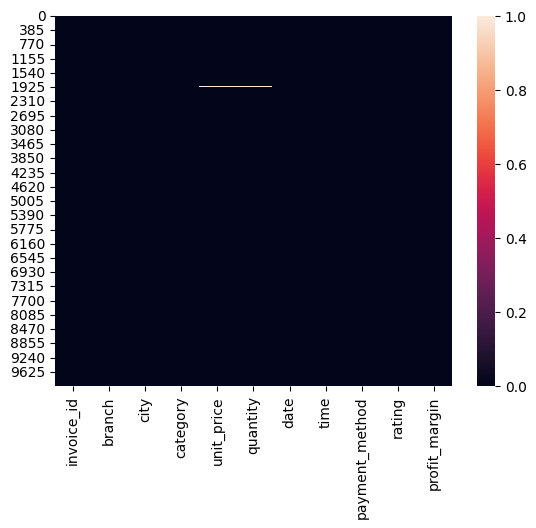

In [193]:
# we will plot headmap to show the null value 
sns.heatmap(df.isnull())

In [194]:
# we will handle the missing value
# we have less than 1% of missing value in quantity, unit_price so we will drop it 
df.dropna(inplace=True)



In [195]:
df.isnull().sum()
# sucessfully drop the columns

invoice_id        0
branch            0
city              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   branch          9969 non-null   object 
 2   city            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   object 
 5   quantity        9969 non-null   float64
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 934.6+ KB


feature engineering

In [197]:
df.head(5)

,invoice_id,branch,city,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [198]:
df.dtypes

invoice_id          int64
branch             object
city               object
category           object
unit_price         object
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

In [199]:
# if you see column unit_price is in object now we will typecast it into float 

list(df['unit_price'].unique())


['$74.69',
 '$15.28',
 '$46.33',
 '$58.22',
 '$86.31',
 '$85.39',
 '$68.84',
 '$73.56',
 '$36.26',
 '$54.84',
 '$14.48',
 '$25.51',
 '$46.95',
 '$43.19',
 '$71.38',
 '$93.72',
 '$68.93',
 '$72.61',
 '$54.67',
 '$40.3',
 '$86.04',
 '$87.98',
 '$33.2',
 '$34.56',
 '$88.63',
 '$52.59',
 '$33.52',
 '$87.67',
 '$88.36',
 '$24.89',
 '$94.13',
 '$78.07',
 '$83.78',
 '$96.58',
 '$99.42',
 '$68.12',
 '$62.62',
 '$60.88',
 '$54.92',
 '$30.12',
 '$86.72',
 '$56.11',
 '$69.12',
 '$98.7',
 '$15.37',
 '$93.96',
 '$56.69',
 '$20.01',
 '$18.93',
 '$82.63',
 '$91.4',
 '$44.59',
 '$17.87',
 '$15.43',
 '$16.16',
 '$85.98',
 '$44.34',
 '$89.6',
 '$72.35',
 '$30.61',
 '$24.74',
 '$55.73',
 '$55.07',
 '$15.81',
 '$75.74',
 '$15.87',
 '$33.47',
 '$97.61',
 '$78.77',
 '$18.33',
 '$89.48',
 '$62.12',
 '$48.52',
 '$75.91',
 '$74.67',
 '$41.65',
 '$49.04',
 '$78.31',
 '$20.38',
 '$99.19',
 '$96.68',
 '$19.25',
 '$80.36',
 '$48.91',
 '$83.06',
 '$76.52',
 '$49.38',
 '$42.47',
 '$76.99',
 '$47.38',
 '$44.86',
 '$2

In [200]:
df['unit_price'].value_counts()

unit_price
$63       159
$15       152
$66       150
$29       149
$58       140
         ... 
$76.52      1
$49.38      1
$42.47      1
$76.99      1
$58.22      1
Name: count, Length: 1008, dtype: int64

In [201]:
# we have dollar sign in unit_price so first we need to remove the dollar sign
def remove_dol(value):
    if value.startswith('$'):
        strings = value.replace('$',' ')
        return strings.lstrip()
    else:
        return value
        
        
    
df['unit_price']=df['unit_price'].apply(remove_dol)
# we have succesfully removed the dollar sign

In [202]:
# we will type cast it into float 
df['unit_price']=df['unit_price'].astype('float64')

In [203]:
df.dtypes
# sucessfully we have type casted it into float

invoice_id          int64
branch             object
city               object
category           object
unit_price        float64
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

In [204]:
# date and time column need to type casted into it's own type so we will cast it 
df['date'] = pd.to_datetime(df['date']).dt.date


C:\Users\varun\AppData\Local\Temp\ipykernel_19128\1261893333.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date']).dt.date


In [205]:
# time col
df['time'] = pd.to_datetime(df['time'],format='%H:%M:%S').dt.time

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   branch          9969 non-null   object 
 2   city            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   float64
 5   quantity        9969 non-null   float64
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 934.6+ KB


In [207]:
df.sample(10)

,invoice_id,branch,city,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
1947,1948,WALM062,Galveston,Fashion accessories,68.00,2.0,2020-09-20,09:54:00,Ewallet,8.0,0.33
593,594,WALM028,Odessa,Sports and travel,75.20,3.0,2019-05-02,11:51:00,Ewallet,4.8,0.48
1402,1403,WALM100,Canyon,Home and lifestyle,66.00,3.0,2023-06-14,09:02:00,Ewallet,5.0,0.18
7915,7916,WALM089,Southlake,Fashion accessories,74.00,3.0,2020-11-28,17:36:00,Credit card,3.0,0.33
8027,8028,WALM050,Victoria,Fashion accessories,64.00,2.0,2023-11-26,17:31:00,Ewallet,5.0,0.48
798,799,WALM098,Mineral Wells,Health and beauty,92.78,1.0,2019-03-15,10:50:00,Credit card,9.8,0.18
3742,3743,WALM019,Pasadena,Home and lifestyle,25.00,2.0,2023-02-10,17:54:00,Ewallet,8.0,0.48
5092,5093,WALM020,Killeen,Home and lifestyle,28.00,3.0,2021-04-09,20:16:00,Credit card,7.0,0.48
5527,5528,WALM010,Laredo,Fashion accessories,84.00,3.0,2020-11-26,16:58:00,Credit card,4.0,0.48
883,884,WALM082,Weslaco,Home and lifestyle,34.42,6.0,2019-03-30,12:45:00,Cash,7.5,0.33


In [210]:
# quantity col is in float we will change it into int
df['quantity']=df['quantity'].astype('int64')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   branch          9969 non-null   object 
 2   city            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   float64
 5   quantity        9969 non-null   int64  
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 934.6+ KB


In [215]:
#this are the numerical col
df.select_dtypes(include=['int64','float64']).columns

Index(['invoice_id', 'unit_price', 'quantity', 'rating', 'profit_margin'], dtype='object')

In [218]:
#this are the categorical col
df.select_dtypes(include='object').columns

Index(['branch', 'city', 'category', 'date', 'time', 'payment_method'], dtype='object')

CHECKING OUTLIERS VISUALLLY

<Axes: ylabel='profit_margin'>

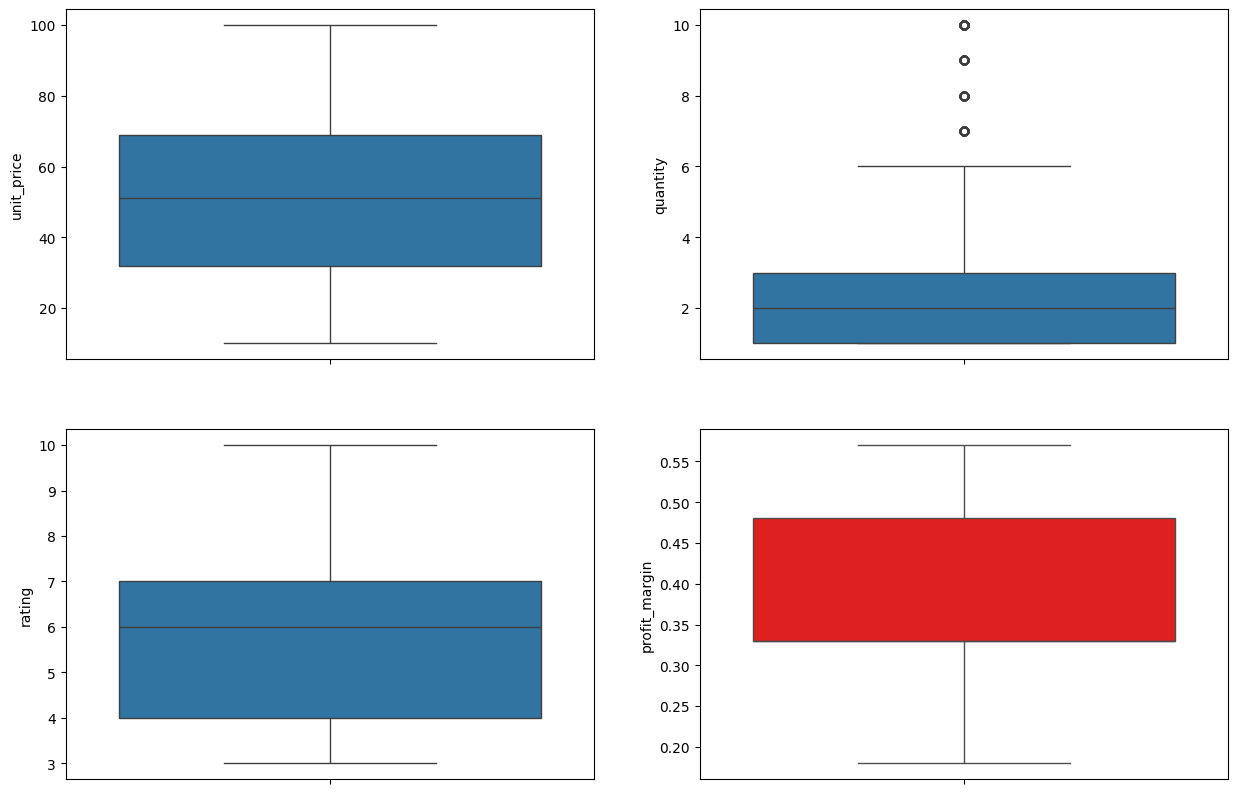

In [225]:
fig,axes = plt.subplots(2,2,figsize=(15,10))

sns.boxplot(df['unit_price'],ax=axes[0,0])
sns.boxplot(df['quantity'],ax=axes[0,1])
sns.boxplot(df['rating'],ax=axes[1,0])
sns.boxplot(df['profit_margin'],ax=axes[1,1],color='red')

IN QUANTITY WE HAVE outliers

DATA IS READY CLEANED AND READY FOR ANALYSIS

# we are directly push our data from dataframe to postsqressql

In [ ]:
# host='localhost'    #database server host or socket director
# port='5432'          #database server port
# username='postgres' # database user name
# password='root'          #force password prompt (should happen automatically)


In [242]:
#making connection b/w database and python 
DATABASE_TYPE = "postgresql"
USERNAME = "postgres"
PASSWORD = "root"
HOST = "localhost"  # Change to your database host
PORT = "5432"       # Default PostgreSQL port
DATABASE = "walmart_db"

# Creating the engine
engine_psql = create_engine(f"{DATABASE_TYPE}://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}")
try:
    engine_psql
    print('succesfully connected to postsgressql')
except:
    print('error unsucessful')

succesfully connected to postsgressql


In [ ]:
# we have saved the clean dataset locally
df.to_csv('cleaned_walmart_dataset.csv')


In [243]:
# now we export or pushing our dataset to dataset 

df.to_sql(name='walmart',con=engine_psql,if_exists='append',index=False)

969